In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [70]:
iris = datasets.load_iris()

In [71]:
iris_data = pd.DataFrame({
    'Sepal length':iris.data[:,0],
    'Sepal width':iris.data[:,1],
    'Petal length':iris.data[:,2],
    'Petal width':iris.data[:,3],
    'class':iris.target
})

In [ ]:
iris_data
# iris dataset link: https://github.com/dotnet/machinelearning/blob/main/test/data/iris.txt
# class 0 = Iris-setosa
# class 1 = Iris-versicolor
# calss 2 = Iris-virginica

In [ ]:
fig = plt.figure(figsize=(5,5))
plt.scatter(iris_data['Sepal length'],iris_data['Sepal width'],c=iris.target)

In [ ]:
import numpy as np
import heapq
from collections import Counter
from matplotlib.colors import ListedColormap

In [74]:
cmap_bold = ListedColormap(['#5E0094', '#018F8B', '#CF9B00'])
cmap_light = ListedColormap(['#CDAFDB', '#91D9D4', '#EBDB9B', '#FFFFFF'])
h = 0.02

In [75]:
def classify(t, X, Y, K):

  distance = list(map(lambda x, y: ((x - t[0]) ** 2 + (y - t[1]) ** 2) ** 0.5, iris_data[X], iris_data[Y]))
    
  nearest = heapq.nsmallest(K, enumerate(distance), key=lambda x: x[1])
  _, nearestDistance = zip(*nearest)
  nearestClass = [iris_data.at[i, 'class'] for i in range(0, len(distance)) if distance[i] <= nearestDistance[-1]]

  countDic = Counter(nearestClass)
  count_max = countDic.most_common(1)[0][1]
  majarity = [key for key, count in countDic.most_common() if count == count_max]

  return majarity[0] if len(majarity)==1 else 3

In [76]:
def knn(x, y, k):
  
  x_min, x_max = round(min(iris_data[x])) - 1, round(max(iris_data[x])) + 1
  y_min, y_max = round(min(iris_data[y])) - 1, round(max(iris_data[y])) + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  z = np.array(list(map(lambda t: classify(t, x, y, k), np.c_[xx.ravel(), yy.ravel()])))
  z = z.reshape(xx.shape)
  
  plt.figure(figsize=(2 * (x_max-x_min), 2 * (y_max-y_min)))
  plt.pcolormesh(xx, yy, z, cmap=cmap_light)
  scatter = plt.scatter(iris_data[x], iris_data[y], c=iris.target, cmap=cmap_bold, alpha=0.8)
  plt.legend(handles=scatter.legend_elements()[0], labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
  plt.title("Iris Classification (k = %i, distance metric = L2, step size = %g)" % (k, h))
  plt.xlabel(x)
  plt.ylabel(y)

attribute1:Sepal length
attribute2:Sepal width
nearest neighbors:3


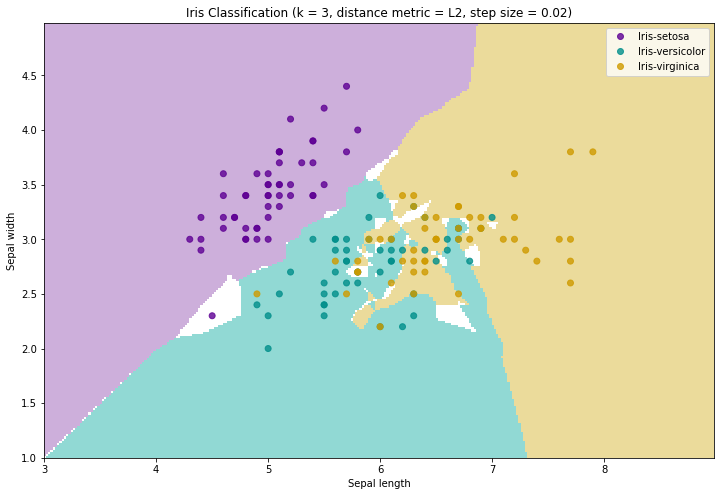

In [77]:
p1 = input("attribute1:")
p2 = input("attribute2:")
k = int(input("nearest neighbors:"))
knn(p1, p2, k)